   Id  SepalLengthCm  PetalLengthCm      Species
0   1            5.1            1.4  Iris-setosa
1   2            4.9            1.4  Iris-setosa
2   3            4.7            1.3  Iris-setosa
3   4            4.6            1.5  Iris-setosa
4   5            5.0            1.4  Iris-setosa 

     Id  SepalLengthCm  PetalLengthCm          Species
95   96            5.7            4.2  Iris-versicolor
96   97            5.7            4.2  Iris-versicolor
97   98            6.2            4.3  Iris-versicolor
98   99            5.1            3.0  Iris-versicolor
99  100            5.7            4.1  Iris-versicolor 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   Species        100 non-null    object 
dtype

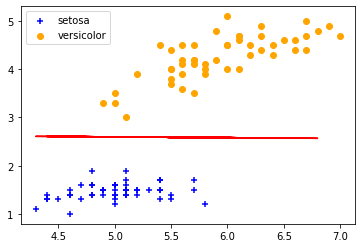

"\n#IMPLEMENTING SVM FROM SCRATCH\nclass svm_model():\n    \n    def __init__(self,xdata=x_train,ydata=y_train,lr=1e-2,lamb=1e-2,epochs=10000):\n        self.x=xdata\n        self.y=ydata\n        self.lr=lr\n        self.lambda_parameter=lamb\n        self.epochs=epochs\n        \n        self.weights=numpy.zeros(xdata.shape[1])\n        self.bias=0\n    \n    def constraint(self,x,y,w,b):\n        constraint=((numpy.dot(x,w)+b)*y) >=1\n        return constraint\n    \n    def weight_update(self,dw,db):\n        self.weights-=self.lr*dw\n        self.bias-=self.lr*db\n    \n    def get_dw_db(self,x,y,w,constraint):\n        if constraint.all():\n            db=0\n            dw=self.lambda_parameter*w\n            return dw,db\n        else:\n            db=-y\n            dw=self.lambda_parameter*w-numpy.dot(y,x)\n            return dw,db\n        \n    def plot_graph(self,w,b,vals):\n        y1=(vals[:,0]*(-w[0],w[1]))-(b/w[1])\n        plt.scatter(sepal[:50],petal[:50],marker='+',c

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
#DATA PREPROCESSORS
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#MODELS 
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB


data=pd.read_csv('C:/Users/Kunal Bibolia/Summer-School-2022/Summer-School-2022/Session_3/data/Iris.csv')
data=data[:100]
data=data.drop(['SepalWidthCm','PetalWidthCm'],axis=1)

#CHECKING THE DATA
print(data.head(),'\n')
print(data.tail(),'\n')
print(data.info())


#EXTRACTING THE DATA
target=numpy.array(data['Species'].apply(lambda x:1 if x=='Iris-setosa' else -1))
sepal=numpy.array(data['SepalLengthCm'])
petal=numpy.array(data['PetalLengthCm'])
x=numpy.transpose([sepal,petal])
verification_data=numpy.transpose([sepal,petal,target])
print('Shape of x data',x.shape)

#PLOTTING THE DATA
plt.scatter(sepal[:50],petal[:50],marker='+',color='blue',label='setosa')
plt.scatter(sepal[50:],petal[50:],marker='o',color='orange',label='versicolor')
plt.legend(loc='best')

#IMPLEMENTING SVM
x,y=shuffle(x,target,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

from sklearn.metrics import accuracy_score


clf=SVC(kernel='linear',probability=True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('Accuracy =',accuracy_score(y_test,y_pred))
print('Coefficients of class variable=',clf.coef_)
print('Intercept',clf.intercept_)
w1,w2=clf.coef_[0][0],clf.coef_[0][1]
c=clf.intercept_
m=(-w1/w2)
print('y=mx+c format where m=',m,'and c=',(-c/w2))
x=x_train[:,0]
y=m*x-(c/w2)
plt.plot(x,y,'red')
plt.show()
'''
#IMPLEMENTING SVM FROM SCRATCH
class svm_model():
    
    def __init__(self,xdata=x_train,ydata=y_train,lr=1e-2,lamb=1e-2,epochs=10000):
        self.x=xdata
        self.y=ydata
        self.lr=lr
        self.lambda_parameter=lamb
        self.epochs=epochs
        
        self.weights=numpy.zeros(xdata.shape[1])
        self.bias=0
    
    def constraint(self,x,y,w,b):
        constraint=((numpy.dot(x,w)+b)*y) >=1
        return constraint
    
    def weight_update(self,dw,db):
        self.weights-=self.lr*dw
        self.bias-=self.lr*db
    
    def get_dw_db(self,x,y,w,constraint):
        if constraint.all():
            db=0
            dw=self.lambda_parameter*w
            return dw,db
        else:
            db=-y
            dw=self.lambda_parameter*w-numpy.dot(y,x)
            return dw,db
        
    def plot_graph(self,w,b,vals):
        y1=(vals[:,0]*(-w[0],w[1]))-(b/w[1])
        plt.scatter(sepal[:50],petal[:50],marker='+',color='blue',label='satosa')
        plt.scatter(sepal[50:],petal[50:],marker='o',color='orange',label='versicolor')
        plt.plot(vals[:,0],y1,'red')
        plt.show()
    
    def find_hyperplane(self):
        epochs=self.epochs
        for e in range(1,epochs):
            for index,vector in enumerate(self.x):
                constraint=self.constraint(vector,self.y[index],self.weights,self.bias)
                dw,db=self.get_dw_db(constraint,vector,self.y[index],self.weights)
                self.weight_update(dw,db)
            
            if e<=10:
                print(-self.weights[0]/self.weights[1],-self.bias/self.weights[1])
                self.plot_graph(self.weights,self.bias,self.x)
                
train_svm=svm_model()
train_svm.find_hyperplane()'''

In [4]:
class SVM_model():

  # intializing the data
  def __init__(self,xdata=x_train,ydata=y_train,lr=1e-2,lamb=1e-2,epochs=10000):
    self.x = xdata
    self.y = ydata
    self.lr = lr
    self.lambda_parameter = lamb
    self.epochs = epochs

    self.weights = numpy.zeros(xdata.shape[1])
    self.bias = 0

  def constraint(self,x,y,w,b): # for getting the constraint 
    constraint = (numpy.dot(x,w) + b)*y >= 1
    return constraint

  def weight_update(self,dw,db): # for updaring thhe weights
    self.weights -= self.lr*dw
    self.bias -= self.lr*db

  def get_dw_db(self,constraint,x,y,w): # for getting the gradients
    if constraint:
      db = 0
      dw = self.lambda_parameter * w
      return dw,db
    else :
      db = -y
      dw = (self.lambda_parameter*w - numpy.dot(y,x))
      return dw,db

  def plot_graph(self,w,b,vals): # plottig the data to visualize the results
      y1 = vals[:,0]*(-w[0]/w[1])-(b/w[1])
      plt.scatter(sepal[:50],petal[:50],marker='+',color='green',label="setosa")
      plt.scatter(sepal[50:],petal[50:],marker='o',color='orange',label="veriscolor")
      plt.plot(vals[:,0],y1,color='red')
      plt.show()
  
  def find_hyperplane(self): # impleemnting all the above functions together to train SVM
      e = 1
      epochs = self.epochs

      while e <= epochs:
        for index,vector in enumerate(self.x):
          constraint = self.constraint(vector,self.y[index],self.weights,self.bias)
          dw,db = self.get_dw_db(constraint,vector,self.y[index],self.weights)
          self.weight_update(dw,db)

        if e<=10:
              print(-self.weights[0]/self.weights[1],-self.bias/self.weights[1])
              self.plot_graph(self.weights,self.bias,self.x)
        e += 1
        
Train_SVM = SVM_model()


0.34356409505934105 0.13800951919870902


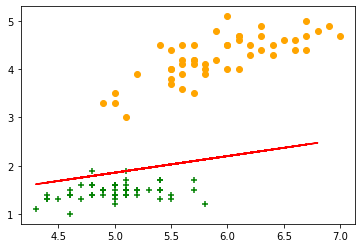

0.47274454792382525 0.17036994386576007


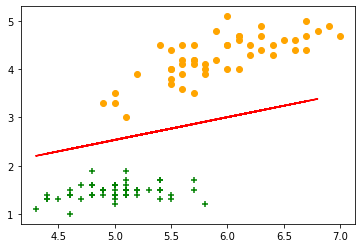

0.4676136671328228 0.17285918268867317


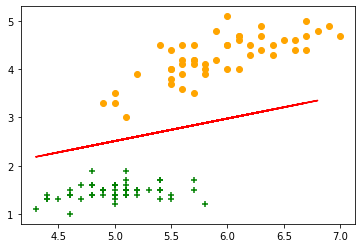

0.44797071713713343 0.16919244349436016


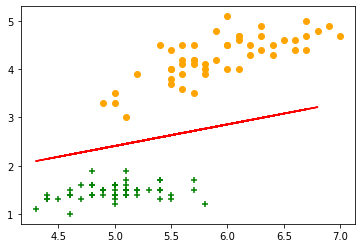

0.44733886175351606 0.17122082620219364


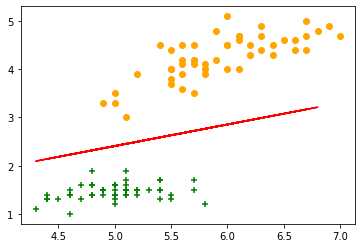

0.44418286867797163 0.17303761859768735


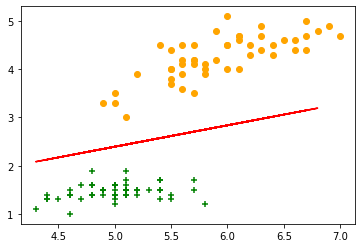

0.45945360982513567 0.1778863181486045


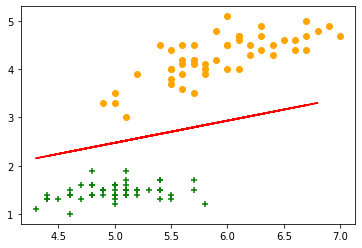

0.47674672957556086 0.18302167827235524


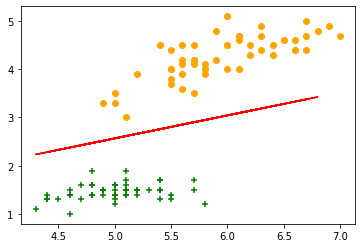

0.45151171581674815 0.17849669619809694


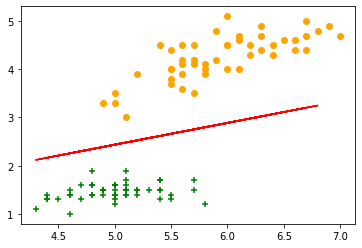

0.43308343896676826 0.1761819435260663


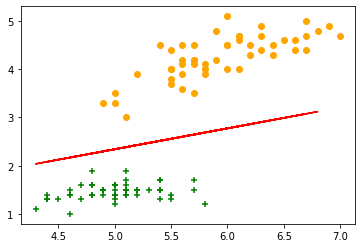

In [5]:
Train_SVM.find_hyperplane()